# USGS Magnitude 2.5+ Earthquakes in the Past Day
Pulls USGC earthquake data from past day

In [1]:
import urllib.request 
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Get JSON data from URL

In [2]:
URL = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_day.geojson"

webUrl = urllib.request.urlopen(URL)
print ("Result code: " + str(webUrl.getcode()))
if (webUrl.getcode() == 200):
    data = webUrl.read()
    JSONdata = json.loads(data)
    print("JSON data loaded")
else:
    print("Error: cannot retrieve data from server" + str(webUrl.getcode()))

Result code: 200
JSON data loaded


In [3]:
if "title" in JSONdata["metadata"]:
    print(JSONdata["metadata"]["title"])
count = JSONdata["metadata"]["count"];
print(str(count) + " events recorded")

USGS Magnitude 2.5+ Earthquakes, Past Day
59 events recorded


In [4]:
mag = np.zeros(count)

loopcounter = 0
for i in JSONdata["features"]:
    mag[loopcounter] = i["properties"]["mag"]
    loopcounter += 1

In [5]:
data = {'mag': mag}
df = pd.DataFrame(data)

In [6]:
"geometry" in JSONdata["features"][1]

True

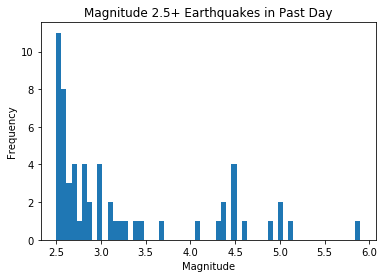

In [7]:
df["mag"].plot.hist(bins = count, title = "Magnitude 2.5+ Earthquakes in Past Day")
plt.xlabel('Magnitude');